<a href="https://colab.research.google.com/github/tayfununal/PyTorch/blob/main/to_Uniform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
import random
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from torch import nn
import matplotlib.pyplot as plt


%matplotlib inline
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

Data shape (1797, 64)


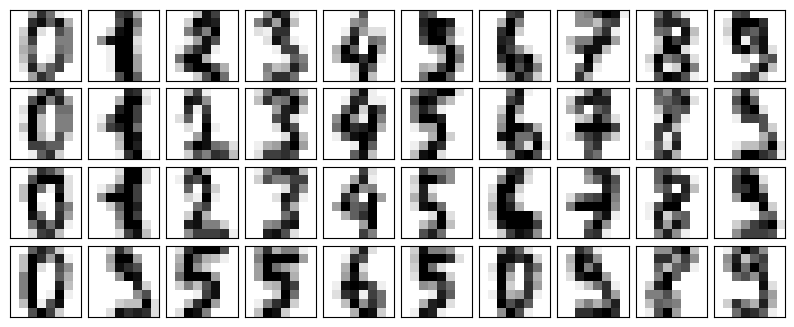

In [235]:
from sklearn.datasets import load_digits


digits = load_digits()
X = digits.data
print('Data shape', X.shape)


def plot_digits(data, w=8):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(w, w),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

plot_digits(digits.data)


In [236]:
class Data(Dataset):
    def __init__(self, dataset):
        super(Data, self).__init__()

        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        x = self.dataset[idx]
        return x

In [237]:
class To_Uniform(torch.nn.Module):

    def __init__(self, input_dim, hidden_layer, output_dim):
        super(To_Uniform, self).__init__()

        self.input_dim = input_dim
        self.hidden_layer = hidden_layer
        self.output_dim = output_dim

        self.linear1 = nn.Sequential(
            nn.Linear(self.input_dim, self.hidden_layer),
            nn.Sigmoid(),
            nn.BatchNorm1d(self.hidden_layer)
        )
        self.linear2 = nn.Sequential(
            nn.Linear(self.hidden_layer, self.hidden_layer),
            nn.Sigmoid(),
            nn.BatchNorm1d(self.hidden_layer)
        )
        self.linear3 = nn.Sequential(
            nn.Linear(self.hidden_layer, self.hidden_layer),
            nn.Sigmoid(),
            nn.BatchNorm1d(self.hidden_layer)
        )
        self.linear4 = nn.Sequential(
            nn.Linear(self.hidden_layer, self.hidden_layer),
            nn.Sigmoid(),
            nn.BatchNorm1d(self.hidden_layer)
        )
        self.linear5 = nn.Sequential(
            nn.Linear(self.hidden_layer, self.output_dim),
            nn.Sigmoid(),
            nn.BatchNorm1d(self.output_dim)
        )

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        x = self.linear4(x)
        x = self.linear5(x)
        return x

    def criterion(self, y, y_hat):
      return - nn.MSELoss()(y, y_hat)

In [238]:
X = digits.data
X = X.reshape(1797, 64)
X = (X - X.min()) / (X.max()-X.min())

X = Data(torch.from_numpy(X).type(torch.float32))
y = torch.from_numpy(digits.target).type(torch.float32)

In [239]:
model = To_Uniform(64, 256, 24)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [240]:
train_loader = DataLoader(X, batch_size=500, shuffle=False)

In [241]:
epochs = 20
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

COST = []

for epoch in range(epochs):
    total_loss = []

    for x_batch in train_loader:

        x_ = x_batch.type(torch.float32) + torch.normal(mean=0.0, std=0.000001, size=(x_batch.shape[0], 64)).type(torch.float32)
        y_hat = model(x_)

        y_pred = model(x_batch)

        loss = model.criterion(y_pred, y_hat)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss.append(loss.item())

    COST.append(np.mean(total_loss))

    if epoch==0:
        print("Epoch : ", epoch+1, "  -----------> Loss : ", np.mean(total_loss))
    elif (epoch+1)%1 == 0:
        print("Epoch : ", epoch+1, "  -----------> Loss : ", np.mean(total_loss))

Epoch :  1   -----------> Loss :  -2.317351432273851e-11
Epoch :  2   -----------> Loss :  -2.3500485845512342e-11
Epoch :  3   -----------> Loss :  -2.352593944307535e-11
Epoch :  4   -----------> Loss :  -2.412464195425401e-11
Epoch :  5   -----------> Loss :  -2.4609226548927277e-11
Epoch :  6   -----------> Loss :  -2.5192015574299065e-11
Epoch :  7   -----------> Loss :  -2.566026297695645e-11
Epoch :  8   -----------> Loss :  -2.5319816989582966e-11
Epoch :  9   -----------> Loss :  -2.6334923391296838e-11
Epoch :  10   -----------> Loss :  -2.7148412858057913e-11
Epoch :  11   -----------> Loss :  -2.7343317714201287e-11
Epoch :  12   -----------> Loss :  -2.8203929643144665e-11
Epoch :  13   -----------> Loss :  -2.877947186119556e-11
Epoch :  14   -----------> Loss :  -2.9575347813143305e-11
Epoch :  15   -----------> Loss :  -3.014962585146108e-11
Epoch :  16   -----------> Loss :  -3.0837340493639065e-11
Epoch :  17   -----------> Loss :  -3.1758234497053506e-11
Epoch :  18 

In [242]:
Y = model(X[:])

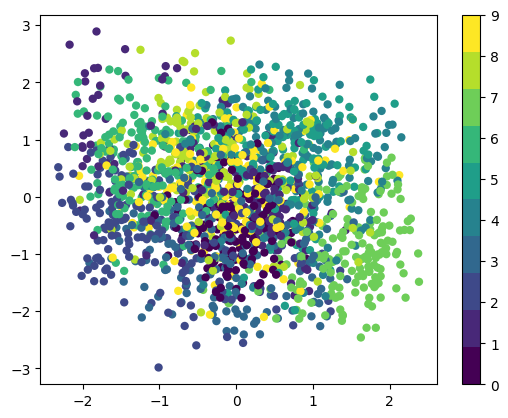

In [255]:
plt_1 = plt.scatter(Y[:,0].detach().numpy(), Y[:,1].detach().numpy(), c=digits.target, edgecolor='none',
            cmap=plt.get_cmap('viridis', 10))
plt.colorbar(plt_1)
plt.show()